In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
import seaborn as sns
import math

from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, DBSCAN

In [2]:
def make_circle(r, n, noise = 30):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-noise,noise), math.sin(2*math.pi/n*x)*r+np.random.normal(-noise,noise)) for x in range(1,n+1)]

# make concentric circles for the dataset - (radius, number of points, noise)
circle_1 = make_circle(100, 300, 30)
circle_2 = make_circle(300, 700, 30)
circle_3 = make_circle(500, 500, 30)
circle_4 = make_circle(700, 900, 30)
circle_5 = make_circle(900, 1000, 30)

# add some noise in the dataset
noise = [(np.random.randint(-1000,1000),np.random.randint(-1000,1000)) for i in range(1000)]

# Convert the array to a dataframe
def arrray_to_df(arr, i):
    df = pd.DataFrame(arr)
    df['cluster'] = str(i)
    return df

# create data from the circle data and noise data
data = [arrray_to_df(arr, i) for i, arr in enumerate([circle_1, circle_2, circle_3,circle_4,circle_5, noise])]
# combine the spearate datasets
data = pd.concat(data)
data.columns = ['x_values', 'y_values', 'cluster']
# normalize the dataset
data_norm = normalize(data)

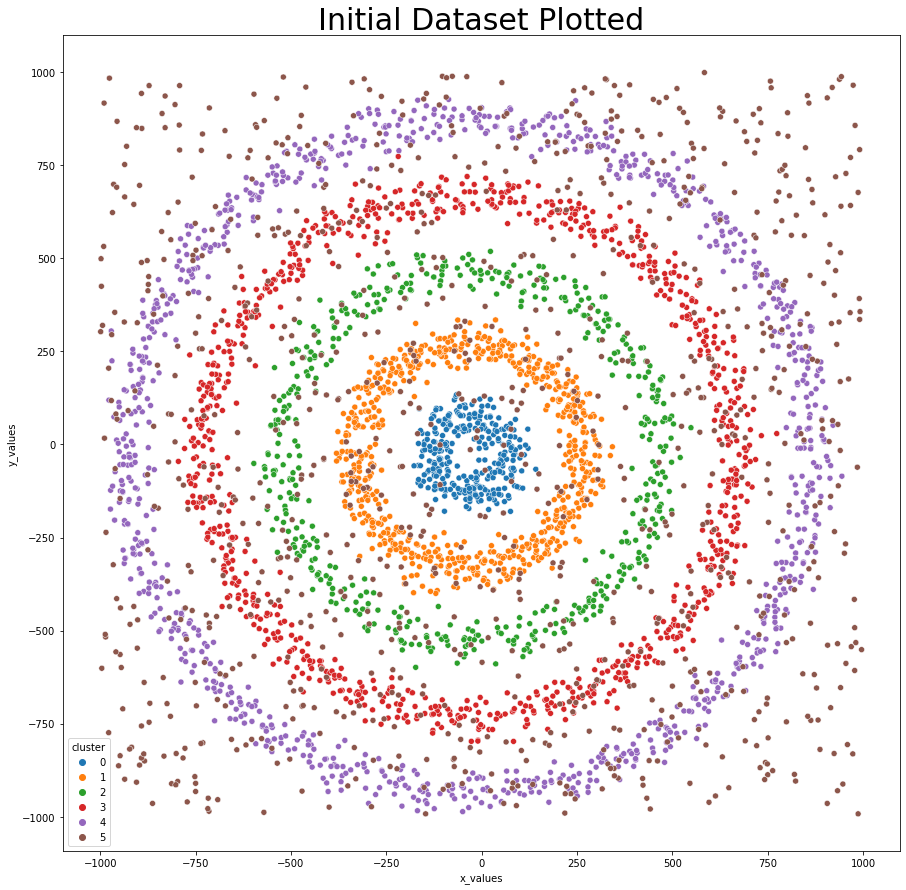

In [3]:
plt.rcParams['figure.figsize'] = [15,15]

sns.scatterplot(data = data, x = 'x_values',y = 'y_values',hue = 'cluster')
plt.title("Initial Dataset Plotted",fontsize=30)

plt.savefig('Output_Images/001. DBSCAN/001.Initial_Data_Plotted.jpg')

plt.show()

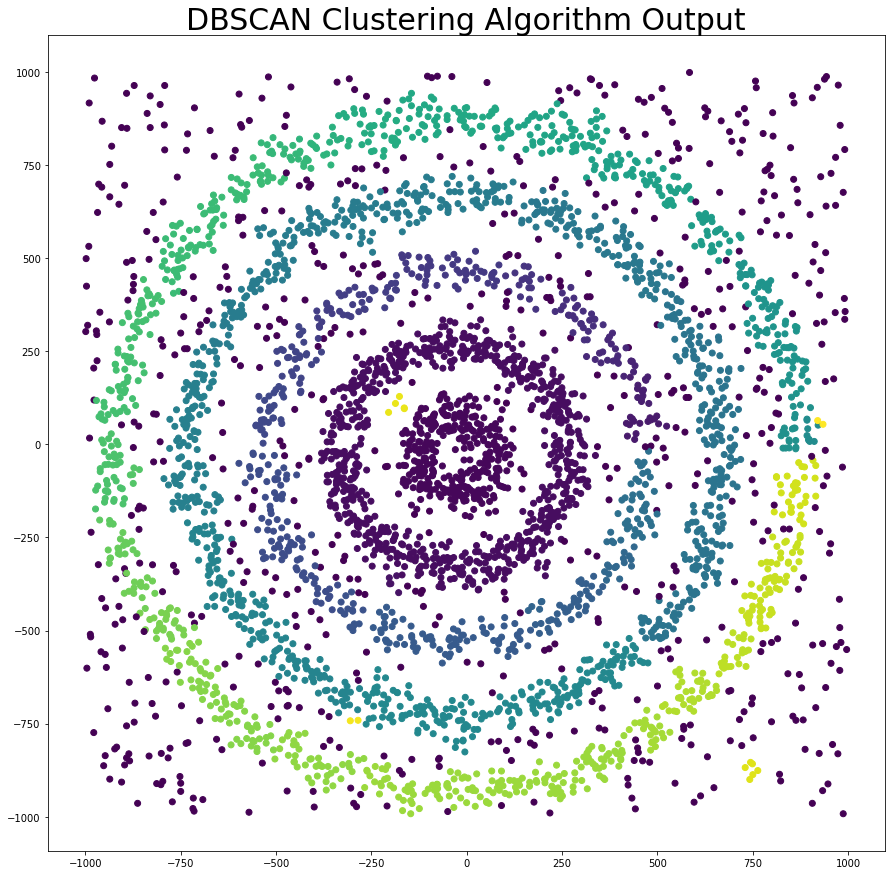

In [4]:
data['dbscan_cluster'] = DBSCAN(eps=32, min_samples=5).fit_predict(data[['x_values', 'y_values']])
plt.scatter(data['x_values'],data['y_values'],c = data['dbscan_cluster'])

plt.title("DBSCAN Clustering Algorithm Output",fontsize=30)
plt.savefig('Output_Images/001. DBSCAN/002.DBSCANs_Clustering_Output.jpg')

plt.show()

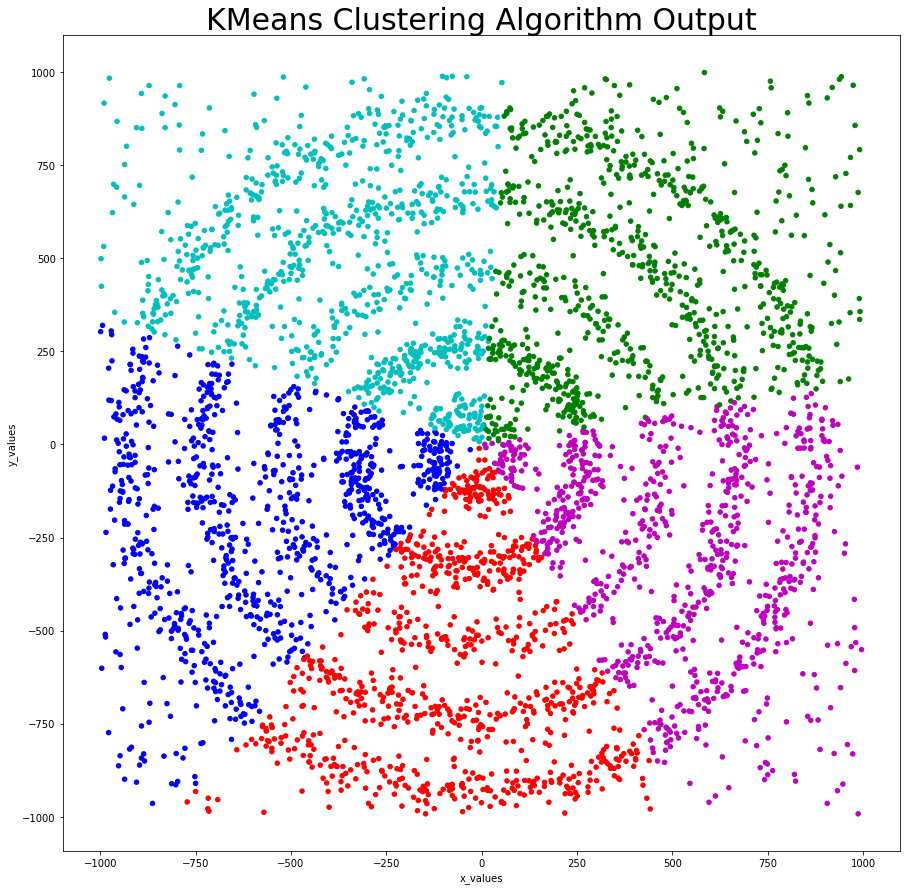

In [5]:
preds = KMeans(n_clusters = 5, random_state =123).fit_predict(data_norm)
cols = {0: 'r',1: 'g',2: 'b',3:'c',4:'m'}

data['kmeans_pred'] = [cols.get(pred) for pred in preds]
data.plot.scatter('x_values', 'y_values', c='kmeans_pred')

plt.title("KMeans Clustering Algorithm Output",fontsize=30)
plt.savefig('Output_Images/001. DBSCAN/003.KMeans_Clustering_Output.jpg')

plt.show()

In [6]:
data.to_csv("DBSCAN_KMeans_Clustering.csv")